In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
import numpy as np
import cv2 as cv
import glob
from google.colab.patches import cv_imshow

In [3]:
img = cv.imread('/content/gdrive/MyDrive/MachineVision/lanes.bmp', cv.IMREAD_GRAYSCALE)

In [4]:
lx = cv.Sobel(img, ddepth=cv.CV_64F, dx=1, dy=0,ksize=3)
ly = cv.Sobel(img, ddepth=cv.CV_64F, dx=0, dy=1,ksize=3)
mag = np.sqrt(np.square(lx)+np.square(ly))
ori = np.arctan2(ly,lx)*180/np.pi

In [5]:
lx_ = (lx-lx.min())/(lx.max()-lx.min())*255
ly_ = (ly-ly.min())/(ly.max()-ly.min())*255
mag_ = (mag-mag.min())/(mag.max()-lx.min())*255
ori_ = (ori-ori.min())/(mag.max()-lx.min())*255

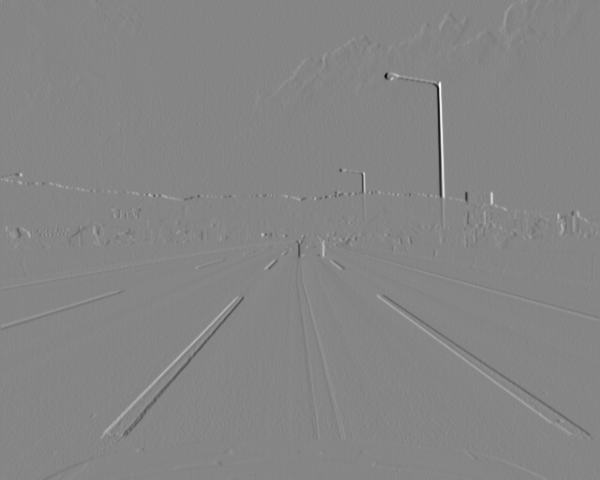

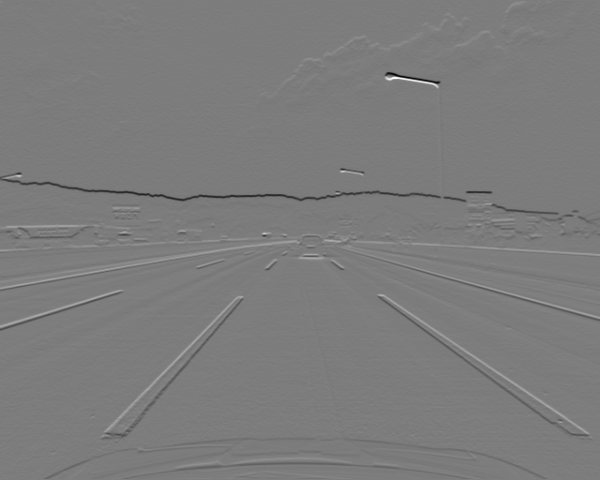

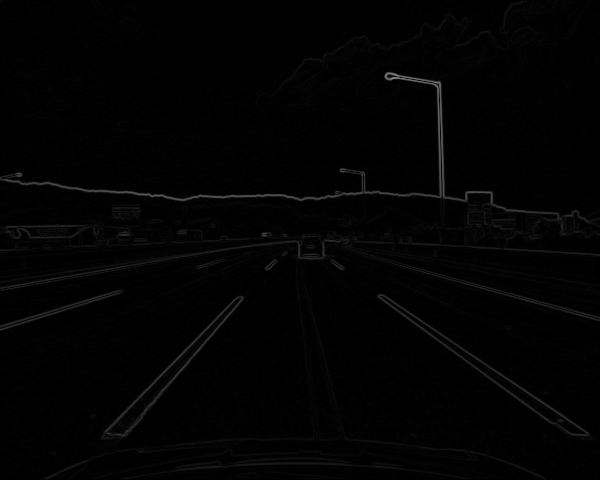

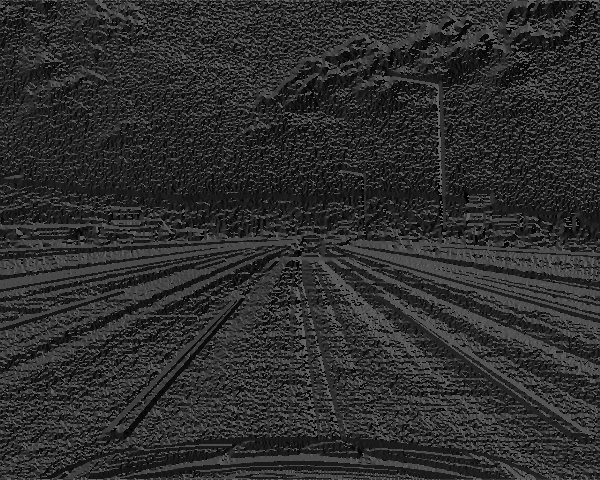

In [6]:
cv_imshow(lx_)
cv_imshow(ly_)
cv_imshow(mag_)
cv_imshow(ori_)

In [7]:
result1 = np.zeros(img.shape)
id1 = np.where((mag>100) & (ori>30) & (ori<60))
result1[id1]=255

result2 = np.zeros(img.shape)
id2 = np.where((mag>100) & (ori>-60) & (ori<-30))
result2[id2]=255

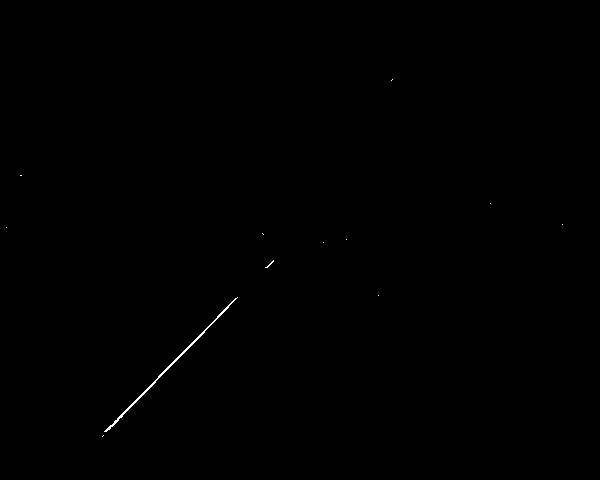

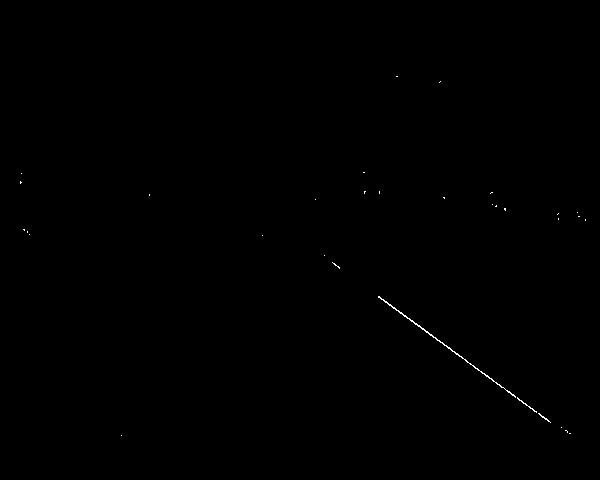

In [8]:
cv_imshow(result1)
cv_imshow(result2)

In [9]:
def f(x,a,b):
  return a*x+b

In [10]:
def ransac_line_fiting(x,y,r,t):
  iter = np.round(np.log(1-0.999) / np.log(1-(1-r)**2) + 1)
  num_max = 0
  for i in np.arange(iter):
    id = np.random.permutation(len(x))
    xs = x[id[:2]]
    ys = y[id[:2]]
    A = np.vstack([xs, np.ones(len(xs))]).T
    ab = np.dot(np.linalg.inv(np.dot(A.T, A)), np.dot(A.T, ys))
    dist = np.abs(ab[0]*x-y+ab[1])/np.sqrt(ab[0]**2+1)
    numInliers = sum(dist < t)
    if numInliers > num_max:
      ab_max = ab
      num_max = numInliers
  return ab_max, num_max

In [11]:
abno1, max1 = ransac_line_fiting(id1[1],id1[0],0.5,2)

In [12]:
img_copy = cv.imread('/content/gdrive/MyDrive/MachineVision/lanes.bmp')
result3 = cv.line(img_copy,(id1[1][np.argmin(id1[1])], int(f(id1[1][np.argmin(id1[1])],abno1[0],abno1[1]))),(id1[1][np.argmax(id1[1])], int(f(id1[1][np.argmax(id1[1])],abno1[0],abno1[1]))),(0,0,255),3)

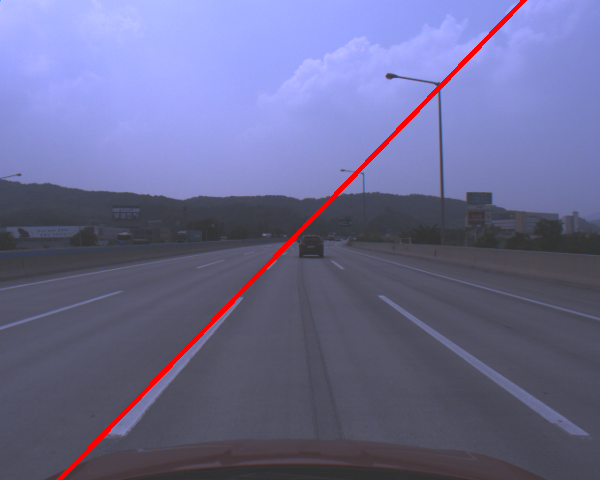

In [13]:
cv_imshow(result3)

In [14]:
abno2, max2 = ransac_line_fiting(id2[1],id2[0],0.5 ,2)

In [15]:
img_copy = cv.imread('/content/gdrive/MyDrive/MachineVision/lanes.bmp')
result4 = cv.line(img_copy,(id2[1][np.argmin(id2[1])], int(f(id2[1][np.argmin(id2[1])],abno2[0],abno2[1]))),(id2[1][np.argmax(id2[1])], int(f(id2[1][np.argmax(id2[1])],abno2[0],abno2[1]))),(0,0,255),3)

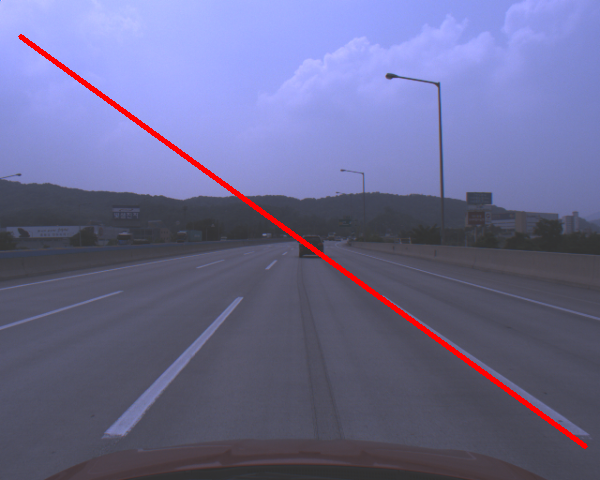

In [16]:
cv_imshow(result4)

In [17]:
cv.imwrite('/content/gdrive/MyDrive/MachineVision/HW3_result/result1.jpg', result1)
cv.imwrite('/content/gdrive/MyDrive/MachineVision/HW3_result/result2.jpg', result2)
cv.imwrite('/content/gdrive/MyDrive/MachineVision/HW3_result/result3.jpg', result3)
cv.imwrite('/content/gdrive/MyDrive/MachineVision/HW3_result/result4.jpg', result4)
cv.imwrite('/content/gdrive/MyDrive/MachineVision/HW3_result/lx.jpg', lx_)
cv.imwrite('/content/gdrive/MyDrive/MachineVision/HW3_result/ly.jpg', ly_)
cv.imwrite('/content/gdrive/MyDrive/MachineVision/HW3_result/mag.jpg', mag_)
cv.imwrite('/content/gdrive/MyDrive/MachineVision/HW3_result/ori.jpg', ori_)

True

In [19]:
img_copy = cv.imread('/content/gdrive/MyDrive/MachineVision/lanes.bmp')
result5 = cv.line(img_copy,(80, int(f(80,abno1[0],abno1[1]))),(280, int(f(280,abno1[0],abno1[1]))),(0,0,255),3)

img_copy = cv.imread('/content/gdrive/MyDrive/MachineVision/lanes.bmp')
result6 = cv.line(img_copy,(350, int(f(350,abno2[0],abno2[1]))),(600, int(f(600,abno2[0],abno2[1]))),(0,0,255),3)

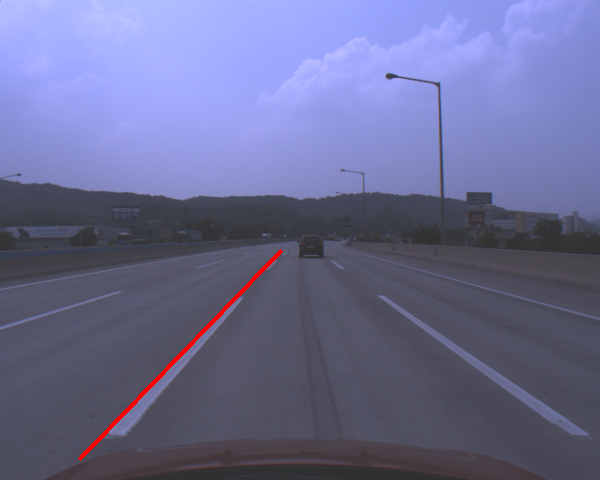

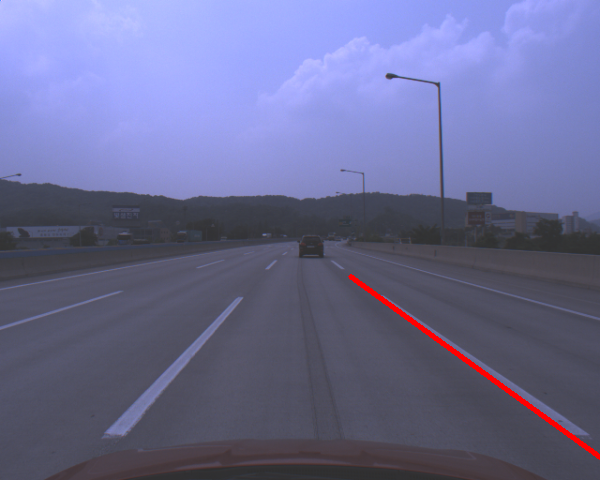

In [20]:
cv_imshow(result5)
cv_imshow(result6)

In [21]:
cv.imwrite('/content/gdrive/MyDrive/MachineVision/HW3_result/result5.jpg', result5)
cv.imwrite('/content/gdrive/MyDrive/MachineVision/HW3_result/result6.jpg', result6)

True